<a href="https://colab.research.google.com/github/Mehpara/Datasets/blob/main/DS3_BR%2C_CC%2C_LP%2C_GB_%2C_LR%2C_SVC%2C_SDG_classifiers_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:

!pip install scikit-multilearn
!pip install simplekml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [133]:
# Load EDA Pkgs
import pandas as pd
import numpy as np
# Load Data Viz Pkgs
import matplotlib.pyplot as plt
import seaborn as sns
#/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
import pandas.util.testing as tm
# ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
### Split Dataset into Train and Text
from sklearn.model_selection import train_test_split

# Feature engineering
from sklearn.feature_extraction.text import TfidfVectorizer
# Multi Label Pkgs

from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN

#Main Libray Import File for BinaryRelevance, Label Powerset ,ClassifierChain 
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.problem_transform import ClassifierChain
from sklearn.svm import SVC

In [134]:
# Load Dataset
df = pd.read_csv("https://raw.githubusercontent.com/Mehpara/Datasets/main/movies_reviews.csv")
df.head()


,id,comment_text,Action,Adult,Adventure,Animation,Biography,Comedy
0,"""#7DaysLater"" (2013)",dayslater interactive comedy series feature en...,0,0,0,0,0,1
1,"""#BlackLove"" (2015) {Crash the Party (#1.9)}",week leave workshops women consider idea ladie...,0,0,0,0,0,0
2,"""#BlackLove"" (2015) {Making Lemonade Out of Le...",women start make stride towards find version h...,0,0,0,0,0,0
3,"""#BlackLove"" (2015) {Miss Independent (#1.5)}",women independent strong theyve face strife re...,0,0,0,0,0,0
4,"""#BlackLove"" (2015) {Sealing the Deal (#1.10)}",despite go life change process past weeks wome...,0,0,0,0,0,0


In [135]:
df.loc[0].comment_text

'dayslater interactive comedy series feature ensemble cast youtube celebrities week audience write brief via social media new episode feature well know guest star days later weeks episode premier tv multiple platforms'

In [136]:
# Check type

df.dtypes

id              object
comment_text    object
Action           int64
Adult            int64
Adventure        int64
Animation        int64
Biography        int64
Comedy           int64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


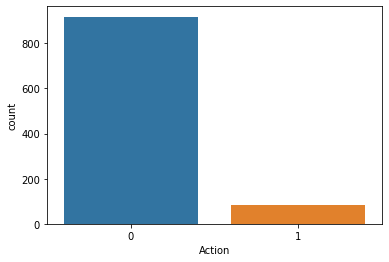

In [137]:
# Value Count 
sns.countplot(df['Action'])

In [138]:
df['Comedy'].value_counts()

0    680
1    320
Name: Comedy, dtype: int64

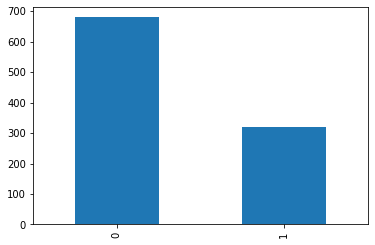

In [139]:
df['Comedy'].value_counts().plot(kind='bar')

In [140]:
#Text Preprocessing    neattext : remove_stopwords  
!pip install neattext
import neattext as nt
import neattext.functions as nfx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [141]:
# Explore For Noise
df['comment_text'].apply(lambda x:nt.TextFrame(x).noise_scan())

0      {'text_noise': 0.9259259259259258, 'text_lengt...
1      {'text_noise': 1.1299435028248588, 'text_lengt...
2      {'text_noise': 1.8315018315018317, 'text_lengt...
3      {'text_noise': 0.2976190476190476, 'text_lengt...
4      {'text_noise': 3.0534351145038165, 'text_lengt...
                             ...                        
995    {'text_noise': 0, 'text_length': 252, 'noise_c...
996    {'text_noise': 0.5263157894736842, 'text_lengt...
997    {'text_noise': 0, 'text_length': 193, 'noise_c...
998    {'text_noise': 0.7920792079207921, 'text_lengt...
999    {'text_noise': 0.4524886877828055, 'text_lengt...
Name: comment_text, Length: 1000, dtype: object

In [142]:
# Explore For Noise
df['comment_text'].apply(lambda x:nt.TextExtractor(x).extract_stopwords())

0                                [via, well]
1                             [towards, put]
2      [make, towards, become, even, though]
3                                     [make]
4                       [go, still, get, go]
                       ...                  
995                                       []
996                                 [behind]
997                                       []
998                     [back, go, see, see]
999                                   [make]
Name: comment_text, Length: 1000, dtype: object

In [143]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [144]:
# Explore For Noise
df['comment_text'].apply(nfx.remove_stopwords)

0      dayslater interactive comedy series feature en...
1      week leave workshops women consider idea ladie...
2      women start stride find version happy end tenn...
3      women independent strong theyve face strife re...
4      despite life change process past weeks women i...
                             ...                        
995    ambush afghanistan examine sophisticate tactic...
996    americas missile field rebroadcast special sce...
997    americas new air force look rise u militarys u...
998    special hour edition look attack american town...
999    safer announce recent death longtime contribut...
Name: comment_text, Length: 1000, dtype: object

In [145]:
corpus = df['comment_text'].apply(nfx.remove_stopwords)

In [146]:
tfidf = TfidfVectorizer()
tfidf

TfidfVectorizer()

In [147]:
# Build Features
Xfeatures = tfidf.fit_transform(corpus).toarray()


In [148]:
Xfeatures

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [149]:
df.head()

,id,comment_text,Action,Adult,Adventure,Animation,Biography,Comedy
0,"""#7DaysLater"" (2013)",dayslater interactive comedy series feature en...,0,0,0,0,0,1
1,"""#BlackLove"" (2015) {Crash the Party (#1.9)}",week leave workshops women consider idea ladie...,0,0,0,0,0,0
2,"""#BlackLove"" (2015) {Making Lemonade Out of Le...",women start make stride towards find version h...,0,0,0,0,0,0
3,"""#BlackLove"" (2015) {Miss Independent (#1.5)}",women independent strong theyve face strife re...,0,0,0,0,0,0
4,"""#BlackLove"" (2015) {Sealing the Deal (#1.10)}",despite go life change process past weeks wome...,0,0,0,0,0,0


In [150]:
y = df[['Action', 'Adult', 'Adventure','Animation', 'Animation', 'Comedy']]
y

,Action,Adult,Adventure,Animation,Animation,Comedy
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
995,0,0,0,0,0,0
996,0,0,0,0,0,0
997,0,0,0,0,0,0
998,0,0,0,0,0,0


In [151]:
# Split Data 
X_train,X_test,y_train,y_test = train_test_split(Xfeatures,y,test_size=0.3,random_state=0)

In [152]:
print(df['comment_text'].shape)
print(X_train.shape)

(1000,)
(700, 9110)


In [153]:
# Building Our Model
# Estimator + Multilabel Estimator
### Problem Transform
import skmultilearn

In [154]:
dir(skmultilearn)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'adapt',
 'base',
 'problem_transform',
 'utils']

In [182]:
# Convert Our Multi-Label Prob to Multi-Class

binary_rel_clf = BinaryRelevance(MultinomialNB())
binary_rel_clf.fit(X_train,y_train)


BinaryRelevance(classifier=MultinomialNB(), require_dense=[True, True])

In [156]:
#multilabel.classes_

In [157]:
#pd.DataFrame(y, columns=multilabel.classes_)

In [158]:
BinaryRelevance(classifier=MultinomialNB(alpha=1.0, class_prior=None,fit_prior=True),require_dense=[True, True])

BinaryRelevance(classifier=MultinomialNB(), require_dense=[True, True])

In [159]:
# Predictions
br_prediction = binary_rel_clf.predict(X_test)
br_prediction

<300x6 sparse matrix of type '<class 'numpy.int64'>'
	with 55 stored elements in Compressed Sparse Column format>

In [160]:
# Convert to Array  To See Result
br_prediction.toarray()

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [161]:
# Accuracy
accuracy_score(y_test,br_prediction)

0.78

In [162]:

# Hamming Loss :Incorrect Predictions
# The Lower the result the better
hamming_loss(y_test,br_prediction)

0.04388888888888889

In [167]:
#f1 score:
print("f1 score:")
print("micro")
print(f1_score(y_test,br_prediction, average='micro'))
print("macro")
print(f1_score(y_test,br_prediction, average='macro'))

f1 score:
micro
0.5820105820105821
macro
0.1206140350877193


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [169]:
#precision :
print("precision:")
print("micro")
print(precision_score(y_test,br_prediction, average='micro'))
print("macro")
print(precision_score(y_test,br_prediction, average='macro'))

precision:
micro
1.0
macro
0.16666666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [170]:
#Recall:
print("recall:")
print("micro")
print(recall_score(y_test,br_prediction, average='micro'))
print("macro")
print(recall_score(y_test,br_prediction, average='macro'))

recall:
micro
0.41044776119402987
macro
0.09450171821305842


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [180]:
#Classifier chain Model building to get results of F1score ,Precison ,Recall
classifier_chain_clf = ClassifierChain(MultinomialNB())
classifier_chain_clf.fit(X_train,y_train)

ClassifierChain(classifier=MultinomialNB(), require_dense=[True, True])

In [172]:
# Predictions
br_prediction = classifier_chain_clf.predict(X_test)
br_prediction

<300x6 sparse matrix of type '<class 'numpy.float64'>'
	with 57 stored elements in Compressed Sparse Column format>

In [173]:
# Convert to Array  To See Result
br_prediction.toarray()

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [174]:
#accuracy ,Hamming Loss
print("accuracy:")
print(accuracy_score(y_test,br_prediction))
print("hamming_loss")
print(hamming_loss(y_test,br_prediction))


accuracy:
0.7866666666666666
hamming_loss
0.042777777777777776


In [175]:
#f1 score:
print("f1 score:")
print("micro")
print(f1_score(y_test,br_prediction, average='micro'))
print("macro")
print(f1_score(y_test,br_prediction, average='macro'))


f1 score:
micro
0.5968586387434555
macro
0.12337662337662336


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [176]:
#precision :
print("precision:")
print("micro")
print(precision_score(y_test,br_prediction, average='micro'))
print("macro")
print(precision_score(y_test,br_prediction, average='macro'))

precision:
micro
1.0
macro
0.16666666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [178]:
#Recall:
print("recall:")
print("micro")
print(recall_score(y_test,br_prediction, average='micro'))
print("macro")
print(recall_score(y_test,br_prediction, average='macro'))

recall:
micro
0.4253731343283582
macro
0.0979381443298969


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [183]:
#Label Powerset Model building to get results of F1score ,Precison ,Recall
label_powerset_clf = LabelPowerset(LogisticRegression())
label_powerset_clf.fit(X_train,y_train)

LabelPowerset(classifier=LogisticRegression(), require_dense=[True, True])

In [184]:
# Predictions
br_prediction = label_powerset_clf.predict(X_test)
br_prediction

<300x6 sparse matrix of type '<class 'numpy.int64'>'
	with 75 stored elements in List of Lists format>

In [185]:
# Convert to Array  To See Result
br_prediction.toarray()

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [186]:
#accuracy ,Hamming Loss
print("accuracy:")
print(accuracy_score(y_test,br_prediction))
print("hamming_loss")
print(hamming_loss(y_test,br_prediction))


accuracy:
0.8333333333333334
hamming_loss
0.03611111111111111


In [187]:
#f1 score:
print("f1 score:")
print("micro")
print(f1_score(y_test,br_prediction, average='micro'))
print("macro")
print(f1_score(y_test,br_prediction, average='macro'))

f1 score:
micro
0.6889952153110048
macro
0.21773288439955105


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [188]:
#precision :
print("precision:")
print("micro")
print(precision_score(y_test,br_prediction, average='micro'))
print("macro")
print(precision_score(y_test,br_prediction, average='macro'))


precision:
micro
0.96
macro
0.32598039215686275


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [189]:
#Recall:
print("recall:")
print("micro")
print(recall_score(y_test,br_prediction, average='micro'))
print("macro")
print(recall_score(y_test,br_prediction, average='macro'))

recall:
micro
0.5373134328358209
macro
0.17001718213058417


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [190]:
#BUILD MODEL
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from skmultilearn.adapt import MLkNN
from sklearn.datasets import make_hastie_10_2
X, y = make_hastie_10_2(random_state=0)
X_train, X_test = X[:10000], X[10000:]
y_train, y_test = y[:10000], y[10000:]
clf = GradientBoostingClassifier(n_estimators=300, learning_rate=1.0,max_depth=4, random_state=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.949

In [191]:
clf.fit(X_train, y_train)
y_pred =clf.predict(X_test)


print("hamming loss: ")
print(hamming_loss(y_test, y_pred))

print("accuracy:")
print(accuracy_score(y_test, y_pred))

print("f1 score:")
print("micro")
print(f1_score(y_test, y_pred, average='micro'))
print("macro")
print(f1_score(y_test, y_pred, average='macro'))

print("precision:")
print("micro")
print(precision_score(y_test, y_pred, average='micro'))
print("macro")
print(precision_score(y_test, y_pred, average='macro'))

print("recall:")
print("micro")
print(recall_score(y_test, y_pred, average='micro'))
print("macro")
print(recall_score(y_test, y_pred, average='macro'))

hamming loss: 
0.051
accuracy:
0.949
f1 score:
micro
0.949
macro
0.9489300852867575
precision:
micro
0.949
macro
0.9499069080636877
recall:
micro
0.949
macro
0.9486413598005754


In [82]:
#Linear SVC 
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC

In [110]:
#Linear SVC Model building to get results of F1score ,Precison ,Recall
from sklearn.svm import LinearSVC

lsvc = LinearSVC(verbose=0)
print(lsvc)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)




LinearSVC()


LinearSVC()

In [120]:
lsvc.fit(X_train, y_train)
br_prediction= lsvc.score(X_train, y_train)
print("Score: ", br_prediction)

Score:  0.5478


In [124]:
print("hamming loss: ")
print(hamming_loss(y_test, br_prediction))

print("accuracy:")
print(accuracy_score(y_test, br_prediction))

print("f1 score:")
print("micro")
print(f1_score(y_test,br_prediction, average='micro'))
print("macro")
print(f1_score(y_test, br_prediction, average='macro'))

print("precision:")
print("micro")
print(precision_score(y_test, br_prediction, average='micro'))
print("macro")
print(precision_score(y_test, br_prediction, average='macro'))

print("recall:")
print("micro")
print(recall_score(y_test, br_prediction, average='micro'))
print("macro")
print(recall_score(y_test,br_prediction, average='macro'))

hamming loss: 


TypeError: ignored

In [125]:
#SGDClassifier
from sklearn.linear_model import SGDClassifier


In [126]:
SGDClassifier_clf =SGDClassifier()
SGDClassifier_clf.fit(X_train,y_train)

SGDClassifier()

In [127]:
# Predictions
br_prediction = SGDClassifier_clf.predict(X_test)
br_prediction

array([-1., -1., -1., ..., -1., -1., -1.])

In [ ]:
print("hamming loss: ")
print(hamming_loss(y_test, br_prediction))

print("accuracy:")
print(accuracy_score(y_test, br_prediction))

print("f1 score:")
print("micro")
print(f1_score(y_test,br_prediction, average='micro'))
print("macro")
print(f1_score(y_test, br_prediction, average='macro'))

print("precision:")
print("micro")
print(precision_score(y_test, br_prediction, average='micro'))
print("macro")
print(precision_score(y_test, br_prediction, average='macro'))

print("recall:")
print("micro")
print(recall_score(y_test, br_prediction, average='micro'))
print("macro")
print(recall_score(y_test,br_prediction, average='macro'))

hamming loss: 
0.4925
accuracy:
0.5075
f1 score:
micro
0.5075
macro
0.5056301697093833
precision:
micro
0.5075
macro
0.5070354742556253
recall:
micro
0.5075
macro
0.5069459870926003


In [ ]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
ex1 = df['title'].iloc[0]

In [ ]:
LogisticRegression_clf =LogisticRegression(solver='lbfgs')
LogisticRegression_clf.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# Predictions
br_prediction = LogisticRegression_clf.predict(X_test)
br_prediction

array([-1., -1., -1., ..., -1., -1.,  1.])

In [ ]:
print("hamming loss: ")
print(hamming_loss(y_test, br_prediction))

print("accuracy:")
print(accuracy_score(y_test, br_prediction))

print("f1 score:")
print("micro")
print(f1_score(y_test,br_prediction, average='micro'))
print("macro")
print(f1_score(y_test, br_prediction, average='macro'))

print("precision:")
print("micro")
print(precision_score(y_test, br_prediction, average='micro'))
print("macro")
print(precision_score(y_test, br_prediction, average='macro'))

print("recall:")
print("micro")
print(recall_score(y_test, br_prediction, average='micro'))
print("macro")
print(recall_score(y_test,br_prediction, average='macro'))

hamming loss: 
0.4852
accuracy:
0.5148
f1 score:
micro
0.5148
macro
0.5080425511964259
precision:
micro
0.5148
macro
0.5144272446655109
recall:
micro
0.5148
macro
0.5137007758225101
